### Dependencies

In [4]:
from netgen.geom2d import unit_square
from ngsolve import *
from ngsolve import grad as ngsolvegrad
from ngsolve.comp import ProxyFunction
from ngsolve.webgui import Draw
#import netgen.gui
import numpy
import pandas as pd
import import_ipynb ### Allows importing the functions in the Refactor notebook
import Refactor ### Notebook that contains functions

### Initialize Parameters

In [2]:
beta = (2,0.001)
eps = 0.01

p = lambda x: x + (exp(beta[0]*(x-1)/eps)-exp(-beta[0]/eps))/(exp(-beta[0]/eps)-1)
q = lambda y: y + (exp(beta[1]*(y-1)/eps)-exp(-beta[1]/eps))/(exp(-beta[1]/eps)-1)

exact = p(x) * q(y)
coeff =  beta[1] * p(x) +  beta[0] * q(y)


new_config = {
    'order': [1, 2],
    'beta': (2,0.001),
    'mesh_size': [1.0, 0.5, 0.25, 0.1250, 0.0625, 0.0313],
    'epsilon': 0.01,
    'exact': exact,
    'coeff': coeff,
    'alpha': 20, 
    'bonus_int_order' : 15,
    'enrich_functions':[p(x), q(y)],
    'enrich_domain_ind':[lambda x,y,h: x > 1 - h/2, lambda x,y,h: y > 1 - h/2]
}


columns = ['Order', 'Mesh Size', 'Error']
error_table = pd.DataFrame(columns=columns)

### Runing with Default Configurations (DG and HDG)

    Order  Mesh Size     Error
0     1.0     1.0000  0.015452
1     1.0     0.5000  0.015269
2     1.0     0.2500  0.064330
3     1.0     0.1250  0.005711
4     1.0     0.0625  0.010397
5     1.0     0.0313  0.005201
6     2.0     1.0000  0.009340
7     2.0     0.5000  0.052477
8     2.0     0.2500  0.011303
9     2.0     0.1250  0.006970
10    2.0     0.0625  0.276752
11    2.0     0.0313  0.005072


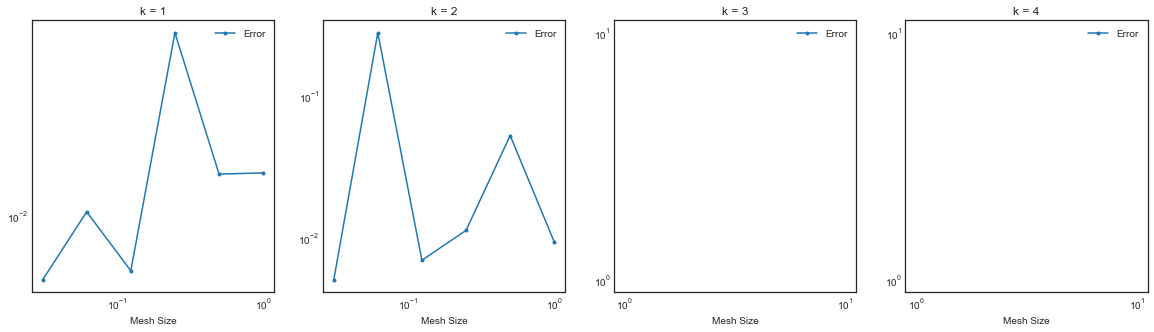

In [3]:
CT = Refactor.Convection_Diffusion(new_config)
table = CT._solveDG()
print(table)
Refactor.plot_error(table)

In [ ]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

mesh_size = [1.0, 0.5, 0.25, 0.1250, 0.0625, 0.0313]
orders = [1, 2, 3, 4]
plt.figure(figsize=(20,10))
columns = 5
listOfImageNames = ['Images/' + "edg-h_"+str(size)+"-k_"+str(order)+".png" for size in mesh_size for order in orders]


for i, imageName in enumerate(listOfImageNames):
    plt.subplot(len(listOfImageNames) / columns + 1, columns, i + 1)
    img= mpimg.imread(imageName)
    plt.imshow(img)

### Testing effect of Integration Order (DG and HDG)

In [ ]:
int_orders = [10, 15, 20]
for val in int_orders:
    print("Bonus integration order.... ", val)
    new_config['bonus_int_order'] = val
    CT = Refactor.Convection_Diffusion(new_config)
    table = CT._solveDG()
    print(table)
    Refactor.plot_error(table)
    print("....................................")

### Testing effect of alpha (HD and HDG)

In [ ]:
alphas = [10, 15, 20, 30, 40]
for alpha in alphas:
    print("alpha .... ", alpha)
    new_config['alpha'] = alpha
    CT = Refactor.Convection_Diffusion(new_config)
    table = CT._solveDG()
    print(table)
    Refactor.plot_error(table)
    print("....................................")